<div align="center"><h3>HW3, Question 5</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import cv2
import scipy
import sklearn
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

# Initializing

In [2]:
digits = pd.read_csv('data/P5/digits.csv')
digits = digits.to_numpy()

# Part A

Performing PCA on dataset

In [3]:
pca = sklearn.decomposition.PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

In [4]:
with np.printoptions(precision=3, suppress=True):
    for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
        print("eigenvalue:", eigenvalue)
        print("Corresponding eigenvector:\n", eigenvector)
        print()

eigenvalue: 179.00693009791823
Corresponding eigenvector:
 [ 0.    -0.017 -0.223 -0.136 -0.033 -0.097 -0.008  0.002 -0.    -0.119
 -0.244  0.149 -0.047 -0.218 -0.015  0.004 -0.    -0.08   0.083  0.216
 -0.172 -0.164  0.029  0.004  0.     0.064  0.254 -0.036 -0.209 -0.043
  0.051  0.    -0.     0.16   0.369  0.164  0.085  0.037  0.022 -0.
  0.001  0.107  0.303  0.248  0.21   0.012 -0.037  0.002  0.001 -0.008
 -0.056  0.093  0.107 -0.138 -0.063  0.001  0.    -0.014 -0.236 -0.141
 -0.009 -0.089 -0.037 -0.011]

eigenvalue: 163.71774688145402
Corresponding eigenvector:
 [-0.    -0.01  -0.049 -0.009 -0.054 -0.118 -0.062 -0.008 -0.    -0.021
  0.06  -0.005 -0.092 -0.052 -0.059 -0.003 -0.     0.036  0.198 -0.049
 -0.226 -0.005  0.027 -0.    -0.     0.077  0.188 -0.138 -0.261  0.05
  0.065  0.    -0.     0.088  0.087 -0.271 -0.285  0.166  0.128 -0.
  0.     0.051  0.13  -0.269 -0.302  0.24   0.218  0.001  0.     0.011
  0.153 -0.12  -0.097  0.286  0.149  0.001 -0.    -0.01  -0.07   0.017
  0.19

# Part B

Estimating bandwidth using `GridSearchCV` Function.

In [5]:
params = {"bandwidth": np.linspace(0, 10, 100)}
grid = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KernelDensity(), params)
grid.fit(data)

/home/engmrgh/university/1th_semester/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [              nan -3466709.1490275   -745844.84825482  -291823.96653975
  -149211.72787683   -91200.78716091   -61022.19758197   -46490.39223013
   -38802.99088539   -33682.43682005   -29783.65314202   -26966.66043344
   -25289.86758456   -23708.77005526   -22676.71962772   -21611.11901415
   -20636.01485561   -19998.75508      -19537.57800202   -19029.12551512
   -18616.43092563   -18304.23390548   -17993.88260551   -17773.37181368
   -17518.47933103   -17361.99198684   -17209.25570758   -17068.68687035
   -16972.79495071   -16895.78572774   -16823.97809412   -16776.75569774
   -16742.64342795   -16717.89733395   -16705.53253879   -16700.93703288
   -16703.57144773   -16713.05866609   -16728.09710542   -16748.03544209
   -16772.1894176    -16799.98389489   -16830.91139349   -16864.53529027
   -16900.47481801   -1693

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.6262...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])})

# Part C

Creating 20 new data from estimated density.

In [6]:
kde = grid.best_estimator_
new_data = kde.sample(20)
new_data = pca.inverse_transform(new_data)

Ploting the created data

/tmp/ipykernel_2383/2402170599.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


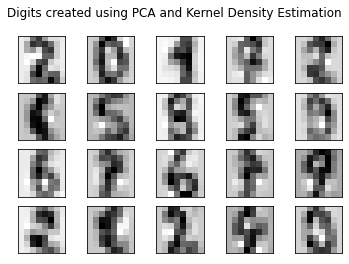

In [7]:
fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, sample in enumerate(new_data):
    im = ax[i//5, i%5].imshow(sample.reshape(8,8), cmap=plt.cm.binary, interpolation="nearest")
fig.suptitle('Digits created using PCA and Kernel Density Estimation')
fig.show()

# Part D

Estimating the best value for bandwidth parameter in range (-1, 1).

In [8]:
params = {"bandwidth": np.linspace(0, 10, 100)}
grid = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KernelDensity(), params)
grid.fit(digits)

/home/engmrgh/university/1th_semester/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [              nan -8252255.71740607 -1524711.35911569  -597005.3921078
  -285816.39510017  -175571.07093779  -145150.62053793  -100382.16699822
   -90433.26430773   -72862.82107603   -63718.15783429   -59995.90105993
   -58073.00804985   -55167.21468534   -53379.55778919   -53083.82113581
   -52943.09091144   -52507.7524319    -53063.38088206   -52695.41793806
   -53151.92748086   -53477.5669274    -53320.86589982   -53828.63673217
   -54324.75924925   -54332.82360895   -54746.38399468   -55048.58382259
   -55302.30043803   -55731.77318926   -56077.57499307   -56390.18538635
   -56764.5136927    -57134.19713115   -57502.74043028   -57865.26392271
   -58223.47364092   -58597.58244876   -58965.53591111   -59330.77072349
   -59701.66667958   -60072.86658497   -60439.31143238   -60806.98808518
   -61171.48287149   -61533

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.6262...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])})

Creating new data using estimated density.

In [9]:
kde = grid.best_estimator_
new_data = kde.sample(20)

Plotting the generated data.

/tmp/ipykernel_2383/3970178266.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


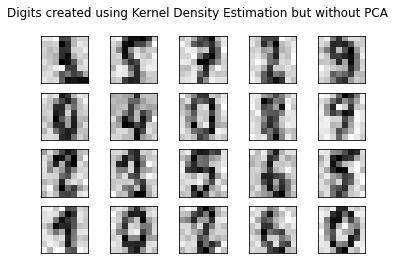

In [11]:
fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, sample in enumerate(new_data):
    im = ax[i//5, i%5].imshow(sample.reshape(8,8), cmap=plt.cm.binary, interpolation="nearest")
fig.suptitle('Digits created using Kernel Density Estimation but without PCA')
fig.show()